In [147]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from scipy import stats as sps

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score
print("Setup Complete")


Setup Complete


In [148]:
titanic_data = pd.read_csv('train.csv')
features = []
titanic_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [149]:
titanic_data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [150]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


Заполним недостающие данные

In [151]:
# Заполняем недостающие данные средними по палате
titanic_data.fillna({'Age': round(titanic_data.Age.mean(), 0)}, inplace=True)

# Выше вероятность того, что люди не находятся в крио-сне, поэтому по умолчанию выберем для всех них False
titanic_data.fillna({'CryoSleep': False}, inplace=True)

# Заполняем численные данные средними значениями
titanic_data.fillna(titanic_data[['RoomService', 'Spa', 'VRDeck']].mean().to_dict(), inplace=True)

# Заполним планету рождения значением Земля, так как оно повторяется чаще всего, то же самое сделаем с VIP
titanic_data.fillna({'HomePlanet': 'Earth', 'VIP': False}, inplace=True)

# Заполним точку назначения TRAPPIST так как он встречается чаще всего
titanic_data.fillna({'Destination':titanic_data.Destination.value_counts().idxmax()}, inplace=True)


C:\Users\Илья\AppData\Local\Temp\ipykernel_3304\1034658511.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titanic_data.fillna({'CryoSleep': False}, inplace=True)
C:\Users\Илья\AppData\Local\Temp\ipykernel_3304\1034658511.py:11: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titanic_data.fillna({'HomePlanet': 'Earth', 'VIP': False}, inplace=True)


In [152]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   object 
 2   CryoSleep     8693 non-null   bool   
 3   Cabin         8494 non-null   object 
 4   Destination   8693 non-null   object 
 5   Age           8693 non-null   float64
 6   VIP           8693 non-null   bool   
 7   RoomService   8693 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8693 non-null   float64
 11  VRDeck        8693 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(3), float64(6), object(5)
memory usage: 772.7+ KB


Уровень выживаемости основываясь на возрастной группе
          Transported
AgeGroup            
1.0           71.13%
2.0           53.28%
3.0           47.13%
4.0           45.88%
5.0           50.67%
6.0           49.37%
7.0            47.6%
8.0           43.48%


Text(0, 0.5, 'Survival chance')

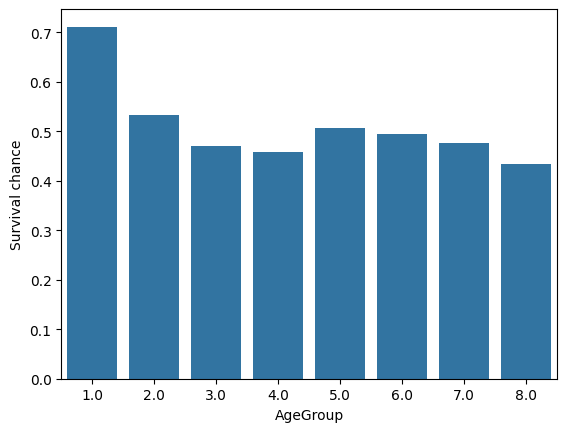

In [153]:
# Проверим влияние возраста, поделив на возрастные группы:
titanic_data['AgeGroup'] = np.nan
for i, j in enumerate(range(0, 71, 10), 1):
    titanic_data.loc[titanic_data.Age >= j, 'AgeGroup'] = i
rate_of_transport_by_age = titanic_data.groupby('AgeGroup').agg({'Transported': lambda col: col.sum() / col.count()})
print(f'Уровень выживаемости основываясь на возрастной группе\n',
      rate_of_transport_by_age.map(lambda x: str(round(x * 100, 2)) + '%'))
sns.barplot(x=rate_of_transport_by_age.index,
            y=rate_of_transport_by_age.Transported)
plt.ylabel('Survival chance')

Таким образом, благодаря представленным данным мы можем увидеть, что более молодые пассажиры имели немного больше шансов попасть в параллельную вселенную. Предположим, что пассажиры в возрасте до 21 года чаще попадали в парллеьную вселенную. Проверим гипотезу при alpha=0.05

In [154]:
# Подготовим функцию, с помощью которой будем определять значимость различий доли попавших в параллельную вселенную у двух групп
def z_proportions(m1, n1, m2, n2):
    p1, p2 = m1 / n1, m2 / n2
    p = (m1 + m2) / (n1 + n2)
    z = (p1 - p2) / (p * (1 - p) * (1/n1 + 1/n2)) ** 0.5
    return (sps.norm.cdf(z), z)


In [155]:
# Разделим группу на две и проверим гипотезу
titanic_data['IsYoung'] = titanic_data.Age <= 20
print(titanic_data.groupby('IsYoung').agg({'Transported': ['sum', 'count']}))
transported_young, young = 2981, 6258
transported_old, old = 1397, 2435
z_proportions(transported_young, young, transported_old, old)

        Transported      
                sum count
IsYoung                  
False          2981  6258
True           1397  2435


(1.770810244331763e-16, -8.15328758739034)

Между группами есть значимые статистические различия, значит, можно включить IsYoung в объясняющие переменные

In [156]:
features.append('IsYoung')

In [157]:
#Проверим влияние статуса VIP на перенос в параллельную вселенную
rate_of_transport_by_vip = titanic_data.groupby('VIP').agg(\
    {'Transported': lambda x: x.sum() / x.count()})
print('Процент попадания в зависимости от статуса\n',
      rate_of_transport_by_vip.map(lambda x: str(round(x * 100, 2)) + '%'))
print()
print('Распределение перемещенных в зависимости от статуса\n',
      titanic_data.groupby('VIP').Transported.agg(['sum', 'count']))


Процент попадания в зависимости от статуса
       Transported
VIP              
False      50.65%
True       38.19%

Распределение перемещенных в зависимости от статуса
         sum  count
VIP               
False  4302   8494
True     76    199


Из VIP клиентов переместились в другое измерение лишь 38%, в то время как из людей без данного статуса в другое измерение попадало чуть более половины людей
Выводим гипотезу, что статус VIP клиента влияет на вероятность попасть в параллельную вселенную

In [158]:
transported_vip, total_vip = 76, 199
transported_usual, total_usual = 4198, 8291
p_value, z_stat = z_proportions(transported_vip, total_vip, transported_usual, total_usual)
print(f'Z статистика = {z_stat};\nPvalue = {p_value}')
print('Различия значимы' if p_value < 0.05 else 'Различия незначимы')

Z статистика = -3.4690904379669174;
Pvalue = 0.00026111181439358346
Различия значимы


Мы выяснили, что различия долей попавших в параллельную вселенную значимы, поэтому данный фактор тоже можно включить в регрессоры

In [159]:
features.append('VIP')

Процент выживаемости в зависимости от точки назначения
 Destination
55 Cancri e       61.0%
PSO J318.5-22    50.38%
TRAPPIST-1e      47.22%
Name: Transported, dtype: object


<Axes: title={'center': 'Влияние назначения на процент выживания'}, xlabel='Transported', ylabel='Destination'>

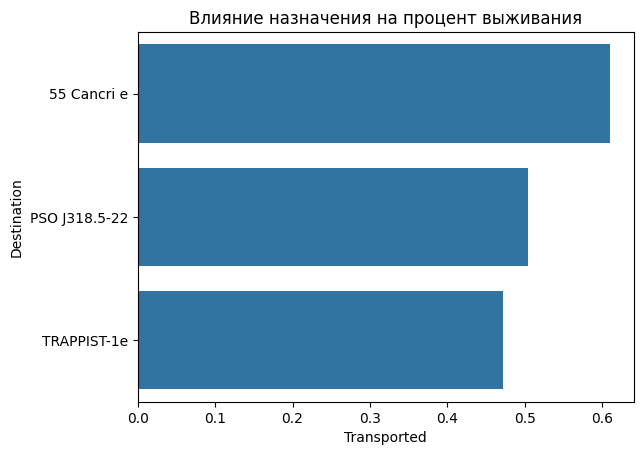

In [160]:
# Проверим влияние на транспортировку точки назначения
rate_of_transport_by_destination = titanic_data.groupby('Destination').Transported.apply(\
    lambda df: df.sum() / df.count())
print('Процент выживаемости в зависимости от точки назначения\n',
      rate_of_transport_by_destination.map(lambda x: str(round(x * 100, 2)) + '%'))
plt.title('Влияние назначения на процент выживания')
sns.barplot(y=rate_of_transport_by_destination.index,
            x=rate_of_transport_by_destination)


Больше всего транспортировались люди, направлявшиеся в 55 Cancri e, а меньше всего те, кто в TRAPPIST-1e. Предположим, что между группами, направлявшимися в TRAPPIST-1e и PSOj318.5-22 нет статистически значимых различий с точки зрения шанса попасть в параллельную вселенную, а между PSO J318.5-22 и 55 Cacnri e – есть

In [161]:
#Разделим людей по направлениям и посчитаем там транспортированных и общее количество, а затем проведем Z-тест
titanic_data.groupby('Destination').agg({'Transported': ['sum', 'count']})

Transported      
                      sum count
Destination                    
55 Cancri e          1098  1800
PSO J318.5-22         401   796
TRAPPIST-1e          2879  6097

In [162]:
z_crit = sps.norm.ppf(0.975)
_, z1 = z_proportions(2787, 5915, 401, 796)
_, z2 = z_proportions(401, 796, 1098, 1800)
print(f'z1 = {z1}, z2 = {z2}')
print('Разница между TRAPPIST-1e и PSO J318.5-22 существенна' \
    if abs(z1) > z_crit else 'Разница между TRAPPOST-1e и PSO J318.5-22 несущественна')
print('Разница между TRAPPIST-1e и 55 Cancri e существенна' \
    if abs(z2) > z_crit else 'Разница между TRAPPOST-1e и 55 Cancri e несущественна')

z1 = -1.7288125912821422, z2 = -5.05234393073277
Разница между TRAPPOST-1e и PSO J318.5-22 несущественна
Разница между TRAPPIST-1e и 55 Cancri e существенна


Мы приходим к заключению, что разница в вероятности попасть в параллельную вселенную в группах TRAPPOST-1e и PSO J318.5-22 статистически незначима, то есть нет смысла выделять их в отдельные группы, поэтому мы можем ввести фиктивную переменную IsCancri, которая показывает, человек направляется в TRAPPIST/PSO либо Cancri

In [163]:
titanic_data['IsCancri'] = titanic_data.Destination == '55 Cancri e'
features.append('IsCancri')

In [164]:
# Рассмотрим, как на наш показатель влияло направление и родная планета
pd.pivot_table(titanic_data,
               index='Destination',
               columns='HomePlanet',
               values='Transported',
               aggfunc=lambda x: str(round(x.mean() * 100, 2)) +'%')

HomePlanet,Earth,Europa,Mars
Destination,,,
55 Cancri e,51.18%,68.96%,61.14%
PSO J318.5-22,50.14%,73.68%,44.9%
TRAPPIST-1e,39.36%,63.54%,51.42%


По поводу точки назначения нет явной закономерности, а вот что касается планет, чаще всего переносились в другое измерение уроженцы планеты Europa. Проверим без влияния точки назначения:

In [165]:
titanic_data.groupby('HomePlanet').agg({'Transported': ['sum', 'count', 'mean']})

Transported                
                   sum count      mean
HomePlanet                            
Earth             2054  4803  0.427649
Europa            1404  2131  0.658846
Mars               920  1759  0.523024

Очень выразительно отличаются между собой вероятности. Проверим их статистически

In [166]:
_, z_mars_earth = z_proportions(1951, 4602, 920, 1759)
_, z_europa_mars = z_proportions(920, 1759, 1404, 2131)
print(f'z_mars_earth = {z_mars_earth}, z_europa_mars = {z_europa_mars}')
print('Разница между Землей и Марсом существенна' \
    if abs(z_mars_earth) > z_crit else 'Разница между Землей и Марсом несущественна')
print('Разница между Марсом и Европой существенна' \
    if abs(z_europa_mars) > z_crit else 'Разница между Марсом и Европой несущественна')

z_mars_earth = -7.102615684588519, z_europa_mars = -8.597119454781144
Разница между Землей и Марсом существенна
Разница между Марсом и Европой существенна


Очень важно будет добавить фактор планеты рождения в регрессоры

In [167]:
features.append('HomePlanet')

In [168]:
# Проверяем влияние нахождения в Криокамере
titanic_data.groupby('CryoSleep').Transported.mean()

CryoSleep
False    0.335042
True     0.817583
Name: Transported, dtype: float64

Даже и не требуется считать значимость данных различий, так как невооруженным глазом видно их существенность – во время крио-сна вероятность попасть в параллельную вселенную была почти на 50% выше!

In [169]:
features.append('CryoSleep')

In [170]:
# Проверим кабины
titanic_data['Cabin'].unique().shape

(6561,)

У кабин очень много уникальных данных, поэтому не получится использовать эти данные для прогноза

<Axes: >

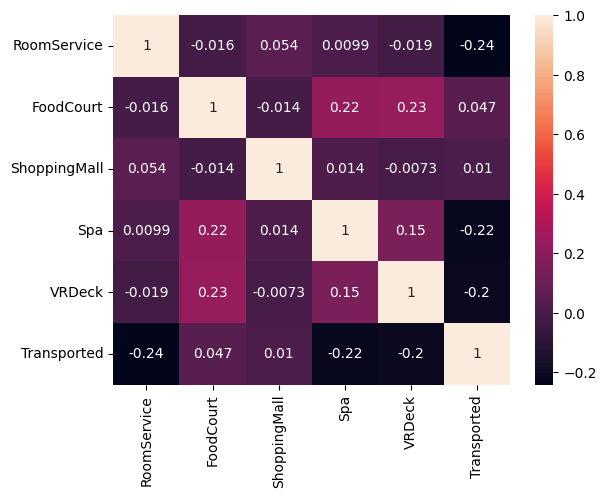

In [171]:
# Рассмотрим оставшиеся данные
remaining_numeric_data = titanic_data.select_dtypes('float64').iloc[:,1:6]
sns.heatmap(pd.concat([remaining_numeric_data, titanic_data.Transported], axis=1).corr(), annot=True) # Проверим степень корреляции

Мы можем заметить, что есть некоторая обратная корреляция между шансом попасть в параллельное измерение и некоторыми затратами.

In [172]:
print('Средняя цена на услуги тех, кого транспортировало\n',
      titanic_data.loc[titanic_data.Transported][['RoomService', 'Spa', 'VRDeck']].mean())
print()
print('Средняя цена на услуги тех, кого НЕ транспортировало\n',
      titanic_data.loc[titanic_data.Transported.map(lambda x: not x)][['RoomService', 'Spa', 'VRDeck']].mean())

Средняя цена на услуги тех, кого транспортировало
 RoomService    66.161506
Spa            66.860811
VRDeck         74.424342
dtype: float64

Средняя цена на услуги тех, кого НЕ транспортировало
 RoomService    385.528247
Spa            558.983260
VRDeck         538.649578
dtype: float64


Невооруженным глазом видно то, что у тех, кого не транспортировало, цена на услуги гораздо выше в среднем

In [173]:
features.extend(['RoomService', 'Spa', 'VRDeck'])

In [174]:
features

['IsYoung',
 'VIP',
 'IsCancri',
 'HomePlanet',
 'CryoSleep',
 'RoomService',
 'Spa',
 'VRDeck']

In [175]:
X, y = titanic_data[features], titanic_data['Transported']
print(X.head())
print()
print(y.head())
print()
print(X.apply(lambda col: col.notna().all(), axis=0)) # Проверка все ли заполнены


   IsYoung    VIP  IsCancri HomePlanet  CryoSleep  RoomService     Spa  VRDeck
0    False  False     False     Europa      False          0.0     0.0     0.0
1    False  False     False      Earth      False        109.0   549.0    44.0
2    False   True     False     Europa      False         43.0  6715.0    49.0
3    False  False     False     Europa      False          0.0  3329.0   193.0
4     True  False     False      Earth      False        303.0   565.0     2.0

0    False
1     True
2    False
3    False
4     True
Name: Transported, dtype: bool

IsYoung        True
VIP            True
IsCancri       True
HomePlanet     True
CryoSleep      True
RoomService    True
Spa            True
VRDeck         True
dtype: bool


In [176]:
X = pd.get_dummies(X)
X.head()

,IsYoung,VIP,IsCancri,CryoSleep,RoomService,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars
0,False,False,False,False,0.0,0.0,0.0,False,True,False
1,False,False,False,False,109.0,549.0,44.0,True,False,False
2,False,True,False,False,43.0,6715.0,49.0,False,True,False
3,False,False,False,False,0.0,3329.0,193.0,False,True,False
4,True,False,False,False,303.0,565.0,2.0,True,False,False


In [177]:
log_reg = LogisticRegression()
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=0)

In [178]:
log_reg.fit(train_X, train_y)

c:\Users\Илья\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [179]:
print(f'Полученная модель будет ошибаться в {round(log_reg.score(val_X, val_y) * 100, 2)}% случаев')

Полученная модель будет ошибаться в 78.01% случаев


In [180]:
test_data = pd.read_csv('test.csv')
test_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [181]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [182]:
test_data.apply(lambda col: col.notna().all(), axis=0)


PassengerId      True
HomePlanet      False
CryoSleep       False
Cabin           False
Destination     False
Age             False
VIP             False
RoomService     False
FoodCourt       False
ShoppingMall    False
Spa             False
VRDeck          False
Name            False
dtype: bool

Все столбцы имеют пропущенные данные

In [183]:
# Заполняем недостающие данные средними по палате
test_data.fillna({'Age': round(test_data.Age.mean(), 0)}, inplace=True)

# Выше вероятность того, что люди не находятся в крио-сне, поэтому по умолчанию выберем для всех них False
test_data.fillna({'CryoSleep': False}, inplace=True)

# Заполняем численные данные средними значениями
test_data.fillna(test_data[['RoomService', 'Spa', 'VRDeck']].mean().to_dict(), inplace=True)

# Заполним планету рождения значением Земля, так как оно повторяется чаще всего, то же самое сделаем с VIP
test_data.fillna({'HomePlanet': 'Earth', 'VIP': False}, inplace=True)

# Заполним точку назначения TRAPPIST так как он встречается чаще всего
test_data.fillna({'Destination':test_data.Destination.value_counts().idxmax()}, inplace=True)

C:\Users\Илья\AppData\Local\Temp\ipykernel_3304\1359523754.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_data.fillna({'CryoSleep': False}, inplace=True)
C:\Users\Илья\AppData\Local\Temp\ipykernel_3304\1359523754.py:11: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_data.fillna({'HomePlanet': 'Earth', 'VIP': False}, inplace=True)


Добавим в тестовые данные самодельные столбцы

In [184]:
test_data['IsYoung'] = test_data.Age <= 20
test_data['IsCancri'] = test_data.Destination == '55 Cancri e'
test_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,IsYoung,IsCancri
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,False,False
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,True,False
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,False,True
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,False,False
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,True,False


In [185]:
test_data.apply(lambda col: col.notna().all(), axis=0)

PassengerId      True
HomePlanet       True
CryoSleep        True
Cabin           False
Destination      True
Age              True
VIP              True
RoomService      True
FoodCourt       False
ShoppingMall    False
Spa              True
VRDeck           True
Name            False
IsYoung          True
IsCancri         True
dtype: bool

In [187]:
test_X = pd.get_dummies(test_data.set_index('PassengerId')[features])
test_X.head()

,IsYoung,VIP,IsCancri,CryoSleep,RoomService,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars
PassengerId,,,,,,,,,,
0013_01,False,False,False,True,0.0,0.0,0.0,True,False,False
0018_01,True,False,False,False,0.0,2823.0,0.0,True,False,False
0019_01,False,False,True,True,0.0,0.0,0.0,False,True,False
0021_01,False,False,False,False,0.0,181.0,585.0,False,True,False
0023_01,True,False,False,False,10.0,0.0,0.0,True,False,False


In [192]:
y_predicted = log_reg.predict(test_X)
res = pd.Series(y_predicted, index=test_X.index).rename('Transported')
res.head(10)

PassengerId
0013_01     True
0018_01    False
0019_01     True
0021_01     True
0023_01     True
0027_01    False
0029_01     True
0032_01     True
0032_02     True
0033_01     True
Name: Transported, dtype: bool

In [193]:
res.to_csv('result.csv')